In [1]:
#read files for camera calibration
import glob

files = glob.glob('./camera_cal/calibration*.jpg')
print(files)

['./camera_cal\\calibration1.jpg', './camera_cal\\calibration10.jpg', './camera_cal\\calibration11.jpg', './camera_cal\\calibration12.jpg', './camera_cal\\calibration13.jpg', './camera_cal\\calibration14.jpg', './camera_cal\\calibration15.jpg', './camera_cal\\calibration16.jpg', './camera_cal\\calibration17.jpg', './camera_cal\\calibration18.jpg', './camera_cal\\calibration19.jpg', './camera_cal\\calibration2.jpg', './camera_cal\\calibration20.jpg', './camera_cal\\calibration3.jpg', './camera_cal\\calibration4.jpg', './camera_cal\\calibration5.jpg', './camera_cal\\calibration6.jpg', './camera_cal\\calibration7.jpg', './camera_cal\\calibration8.jpg', './camera_cal\\calibration9.jpg']


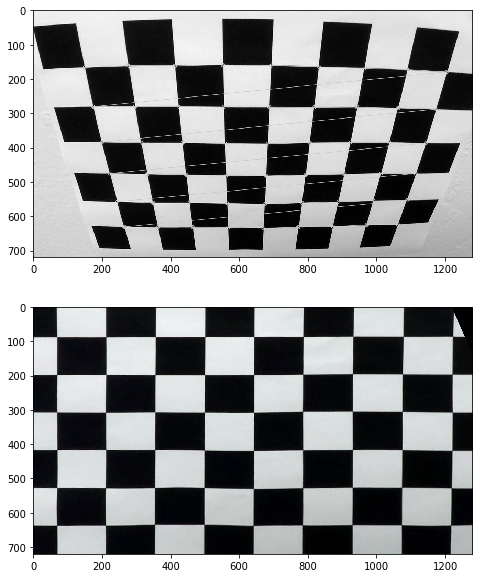

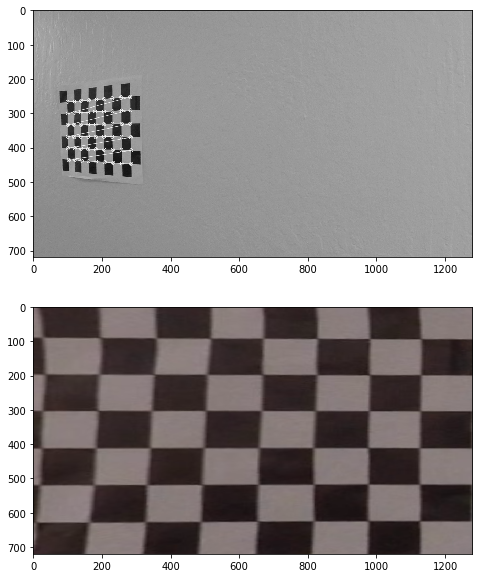

In [68]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np

def calibrate_camera(filename):
    plt.figure(figsize=(10,10))
    objpoints=[]
    imgpoints=[]

    objp=np.zeros((9*6,3),dtype=np.float32)
    objp[:,:2]=np.mgrid[0:9,0:6].T.reshape(-1,2)
    #read image from file
    img = cv2.imread(filename)
    #convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #find chessboard corners
    ret, corners = cv2.findChessboardCorners( gray,(9,6),None)
    #draw chessboard corners
    if ret:
        imgpoints.append(corners)
        objpoints.append(objp)
        cv2.drawChessboardCorners( gray, (9,6), corners, ret )
        #show image
        plt.subplot(2,1,1)
        plt.imshow(gray,cmap='gray')
        
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
        undstrt_img = cv2.undistort(img, mtx, dist, None, mtx)
        
        src_points = np.float32([corners[0], corners[8], corners[-1], corners[-9]])
        
#         x_diff=max(corners[1][0][0]-corners[0][0][0],corners[10][0][0]-corners[9][0][0])
#         y_diff=max(corners[9][0][1]-corners[0][0][1],corners[10][0][1]-corners[1][0][1])
#         print(x_diff,y_diff)
        
        offset=100
        dest_points = np.float32([[offset,offset], [img.shape[1]-offset,offset],
                [img.shape[1]-offset,img.shape[0]-offset], [offset,img.shape[0]-offset]])

#         dest_points = np.float32([ corners[0][0], corners[0][0]+[offset,0], corners[0][0]+[offset,offset], corners[0][0]+[0,offset]])
        
        M = cv2.getPerspectiveTransform(src_points,dest_points)
        warped = cv2.warpPerspective(undstrt_img, M, (img.shape[1],img.shape[0]), flags=cv2.INTER_LINEAR )
        plt.subplot(2,1,2)
        plt.imshow(warped)
    plt.show()
    
calibrate_camera('./camera_cal/calibration2.jpg')
calibrate_camera('./camera_cal/calibration11.jpg')
    
    